<a href="https://colab.research.google.com/github/novagenio/UNIR_SCA/blob/main/clases/Semana_2_Sistemas_cognitivos_artificialesV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En primer lugar vamos a importar tensorflow y vamos a comprobar su versión

In [6]:
import tensorflow as tf
print(tf.__version__)

2.7.0


Ahora, vamos a importar keras y a ver su versión

In [7]:
from tensorflow import keras
print(keras.__version__)

2.7.0


**Construcción de una clasificador de imagenes utilizando una API secuencial**

vamos a cargar ahora uno de los dataset de entrenamiento de keras, el reconocimiento de los digitos

In [8]:
from tensorflow.keras.datasets import mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data() #fashion_mnist.load_data()





Vamos a ver el tamaño del dataset, y el tamaño de la imagen

In [9]:
X_train_full.shape

(60000, 28, 28)

Muestra los valores de las etiquetas: Entrenamiento y test


In [10]:
print(y_train_full, y_test )


[5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6]


Aqui comprobamos el tipo de dato 

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
print(X_train_full[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

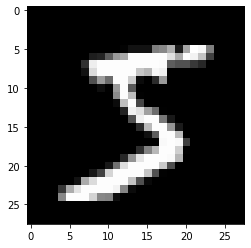

In [13]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro

Un poco de pretratamiento de los datos, en este caso como vamos a usar el gradient descent, necesitamos reescalar los datos a 0-1

In [14]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Mostramos la imagen, luego el datos y su etiqueta (y)

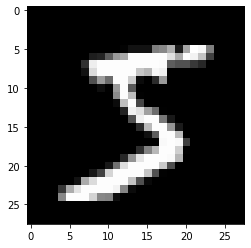

In [15]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(X_train_full[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro


In [16]:
print("X_valid", X_valid)
print("X_train_full", X_train_full)
print("y_valid", y_valid[0])

X_valid [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
X_

Le damos un nombre a cada una de las clases

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(y_train[0], class_names[y_train[0]])

7 Sneaker


**Creación del modelo usando una API secuencial**

In [18]:
model= keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

otra forma de hacer esta misma operación de añadir capas:


In [19]:
# model= keras.models.Sequential([]
#    keras.layers.Flatten(input_shape=[28,28])
#    keras.layers.Dense(300, activation="relu")
#    keras.layers.Dense(300, activation="relu")
#    keras.layers.Dense(10, activation="softmax")
#])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


Vamos ahora a ver las capas

In [21]:
model.layers

algunas operaciones y comando interesantes

In [22]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer('dense_2') is hidden1

False

Todos los parametros de una capa estan accesibles utilizando "get_weights()" y "set_weights()"

In [24]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0300229 , -0.00184993,  0.04614923, ..., -0.03435344, -0.06326465,  0.00548196],
       [-0.03122155, -0.00186448, -0.00016566, ..., -0.06531902,  0.04903954, -0.01457482],
       [ 0.04572017, -0.02608708, -0.02274663, ..., -0.06418677,  0.01467992,  0.06279105],
       ...,
       [-0.04657595,  0.00795238, -0.06536277, ...,  0.02453201, -0.07345972,  0.0042504 ],
       [ 0.00072157,  0.00823024, -0.00895754, ..., -0.04765794,  0.02426083,  0.07005468],
       [-0.05136574,  0.02621983,  0.03912006, ...,  0.05259369, -0.0665268 ,  0.02268221]], dtype=float32)

In [25]:
weights.shape

(784, 300)

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

In [27]:
biases.shape

(300,)

**Compilando el modelo**

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics =["accuracy"])

**Entrenando y evaluando el modelo**

In [29]:
history = model.fit(X_train,y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6123 - accuracy: 0.8442 - val_loss: 0.3027 - val_accuracy: 0.9176
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2911 - accuracy: 0.9164 - val_loss: 0.2383 - val_accuracy: 0.9336
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2389 - accuracy: 0.9318 - val_loss: 0.2041 - val_accuracy: 0.9422
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2037 - accuracy: 0.9426 - val_loss: 0.1853 - val_accuracy: 0.9490
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1786 - accuracy: 0.9489 - val_loss: 0.1585 - val_accuracy: 0.9590
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1582 - accuracy: 0.9553 - val_loss: 0.1419 - val_accuracy: 0.9622
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1417 - accuracy: 0.9590 - val_loss: 0.1326 - val_accuracy:

Ahora vamos a comprobar las variables loss, accuracy, validation_loss y validation_accuracy

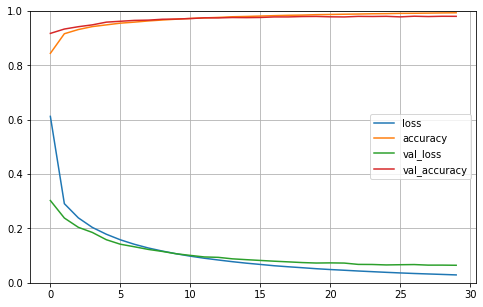

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Fijaros que las curvas training accuracy y validation accuracy  se van incrementando durante el entrenamiento, mientras que las loss se hacen mas pequeñas

In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 11.7567 - accuracy: 0.9762


[11.756731986999512, 0.9761999845504761]

Model.predict y X_test, entrega la etiqueta de predicción del modelo, 

In [32]:
predict=model.predict(X_test)

In [33]:
print(predict[1], y_test[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 7


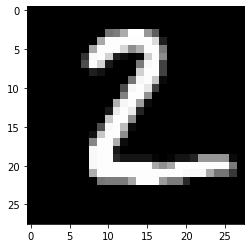

In [34]:
plt.imshow(X_test[1], cmap="gray")

In [35]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)